# K-means

*k*-means is a straightforward, though computationally expensive hard clustering method.  *k* is the number of clusters, chosen by the user.  This method groups points together by minimizing the distance between a cluster mean (centroid) and all the data points within the cluster.  Specifically, *k*-means uses a cost function called the *inertia*:

$$ \sum(\bar{x}_c - x_i)^2 $$

The algorithm works iteratively from a random centroid value for each of the *k* clusters.  First, it assigns each data point to the nearest centroid.  Then it creates new centroids by taking the mean of all the data points assigned to each centroid.  The solution is reached when the difference between steps is lower than a predetermined threshold.  Because the random centroid start could lead to a poor final solution, it's recommended to run the algorithm several times.  Additionally, sklearn contains a `kmeans++` option to initialize distant centroids, which is less likely to lead to a poor outcome.

*k*-means assumes that the data are radially symmetric (isotropic) and that each cluster has similar variance.

High-dimensional data makes the algorithm run more slowly due to the significant computational effort to measure distance in higher dimensional space.  A common practice is to run PCA beforehand or to use `MiniBatchKMeans` which will randomly sample the training data in each iteration.

If the number of clusters isn't known *a priori* then trial and error must be used to choose a reasonable value for *k*.

We'll now try *k*-means out on [heart disease data](http://archive.ics.uci.edu/ml/datasets/Heart+Disease).  The goal will be to create a *k*-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters.

In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
%matplotlib inline

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and target
X = df.iloc[:, :13]
Y = df.iloc[:, 13]

# Replace missing data
X = X.replace(to_replace='?', value=0)

# Binarize the target (heart disease = 1, no heart disease = 0)
Y = np.where(Y > 0, 0, 1)


0.6039603960396039


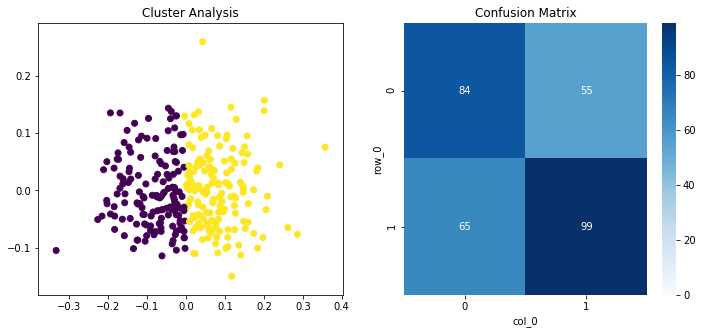

In [45]:
# Will reduce the data to 2 components using PCA in order to visualize

X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

# K-means, random state to match curriculum
Y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

print(accuracy_score(Y, Y_pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_pred)
plt.title('Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Y_pred), annot=True, vmin=0, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

That's a poor model!  Let's try running MiniBatch.

0.6237623762376238


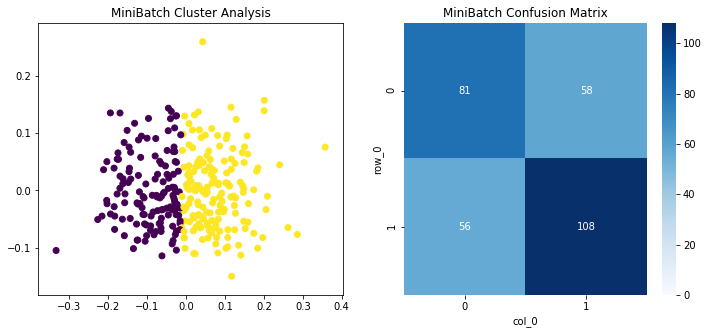

In [41]:
# Each batch will contain 200 samples
minibatchkmeans = MiniBatchKMeans(init='random', 
                                  n_clusters=2, 
                                  batch_size=200,
                                  random_state=42)
Mini_pred = minibatchkmeans.fit_predict(X_pca)

print(accuracy_score(Y, Mini_pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Mini_pred)
plt.title('MiniBatch Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Mini_pred), annot= True, vmin=0, cmap='Blues', fmt='g')
plt.title('MiniBatch Confusion Matrix')
plt.show()

The MiniBatch has slightly higher accuracy (for the same random state) than the regular *k*-means.

In [42]:
# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(Y_pred, Mini_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      137   12
1        0  154


We can see that the two solutions only differ in 12 predictions.  Now let's see what the computational difference is between the algorithms.

In [25]:
%%timeit
KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

17.5 ms ± 788 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
minibatchkmeans.fit_predict(X_pca)

6.73 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


MiniBatch takes 65% less computational time.

# Drill

Play with *k* and potentially find more compelling solutions.

0.19471947194719472


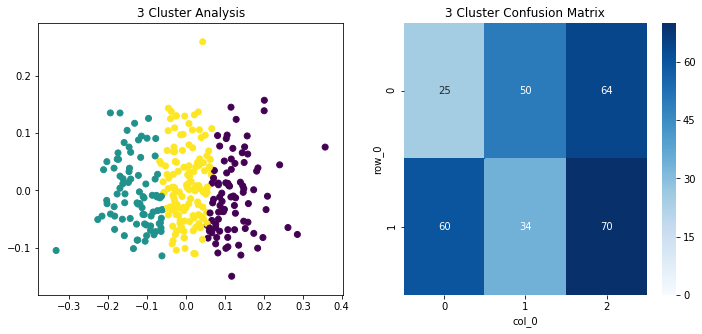

In [51]:
# K-means with 3 clusters
X_3pca = PCA(3).fit_transform(X_norm)
Y_3pred = KMeans(n_clusters=3, init='k-means++').fit_predict(X_3pca)

print(accuracy_score(Y, Y_3pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_3pca[:, 0], X_3pca[:, 1], c=Y_3pred)
plt.title('3 Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Y_3pred), annot=True, vmin=0, cmap='Blues')
plt.title('3 Cluster Confusion Matrix')
plt.show()

0.3234323432343234


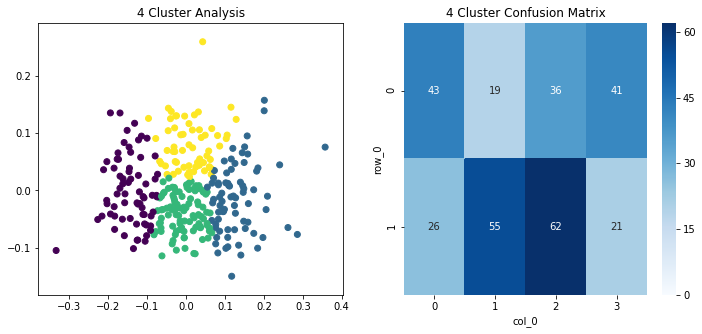

In [53]:
# K-means with 4 clusters
X_4pca = PCA(4).fit_transform(X_norm)
Y_4pred = KMeans(n_clusters=4, init='k-means++').fit_predict(X_4pca)

print(accuracy_score(Y, Y_4pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_4pca[:, 0], X_4pca[:, 1], c=Y_4pred)
plt.title('4 Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Y_4pred), annot=True, vmin=0, cmap='Blues')
plt.title('4 Cluster Confusion Matrix')
plt.show()

0.19801980198019803


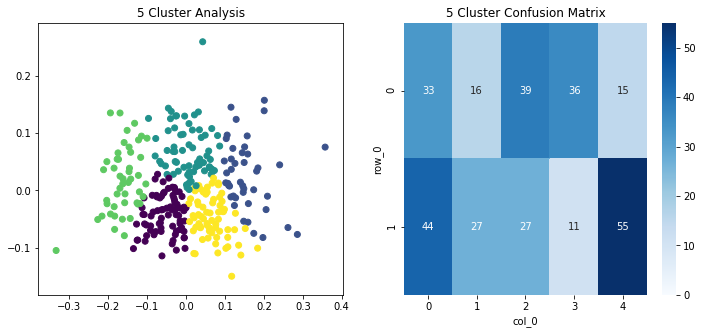

In [54]:
# K-means with 5 clusters
X_5pca = PCA(5).fit_transform(X_norm)
Y_5pred = KMeans(n_clusters=5, init='k-means++').fit_predict(X_5pca)

print(accuracy_score(Y, Y_5pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_5pca[:, 0], X_5pca[:, 1], c=Y_5pred)
plt.title('5 Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Y_5pred), annot=True, vmin=0, cmap='Blues')
plt.title('5 Cluster Confusion Matrix')
plt.show()

0.07920792079207921


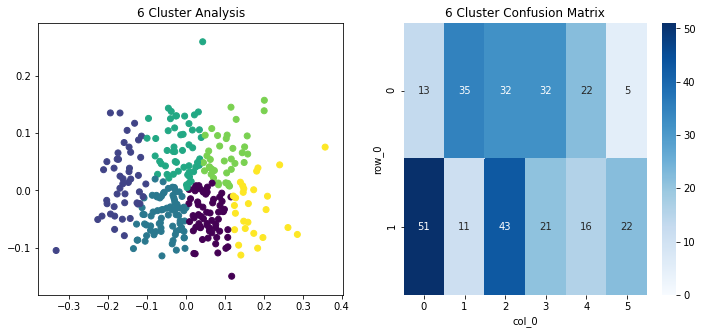

In [55]:
# K-means with 6 clusters
X_6pca = PCA(6).fit_transform(X_norm)
Y_6pred = KMeans(n_clusters=6, init='k-means++').fit_predict(X_6pca)

print(accuracy_score(Y, Y_6pred))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_6pca[:, 0], X_6pca[:, 1], c=Y_6pred)
plt.title('6 Cluster Analysis')

plt.subplot(122)
sns.heatmap(pd.crosstab(Y, Y_6pred), annot=True, vmin=0, cmap='Blues')
plt.title('6 Cluster Confusion Matrix')
plt.show()